# Exercise 7: Support Vector Machines
In this exercise, we will explore SVM kernels and study the effect of the hyperparameters on a toy dataset. 

In [1]:
# Required libraries
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import svm

### **Data**
 

In the assignment .zip file, you can find a .csv file called toy_dataset.csv.

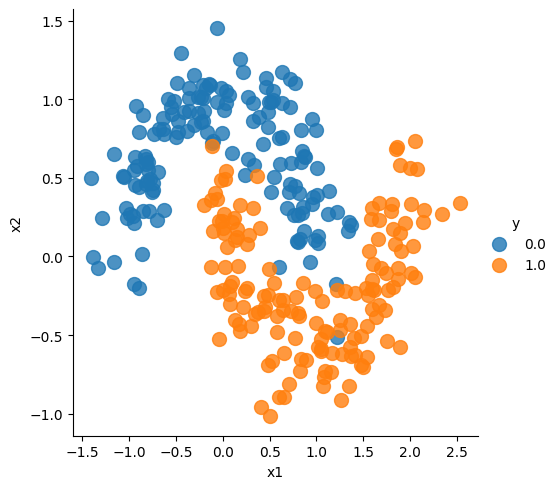

In [2]:
### ToDo
## Import the data
import pandas as pd
df = pd.read_csv('toy_dataset.csv')
df.head()

## Visualize the data to explore it
sns.lmplot(x='x1', y='x2', data=df, hue='y', fit_reg=False, scatter_kws={"s": 100})
plt.show()



In [3]:
## Helper function to plot the decision boundary of a classifier. 
def plot_decision_svm(X, y, clf, kernel_name = 'Linear'):

  # X -- The data points
  # y -- The labels
  # clf -- The classifier
  # Kernel_name -- name of the kernel: string Linear, poly, RBF
  ax = plt.subplot(1, 1, 1)
  h = 0.05 # step size
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot the points
  ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr,
              edgecolors='k')

  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  #ax.set_xticks(())
  #ax.set_yticks(())

  ax.set_title(kernel_name)
  plt.tight_layout()
  plt.show()

In [4]:
# Helper function to visualize the results of a grid search with the two hyperparameters of rbf kernel as a heatmap
def heatmap(grid):
    """
    grid --  GridSearchCV instance  
    """
    pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
        values='mean_test_score', index='param_C', columns='param_gamma')
    ax = sns.heatmap(pvt, annot=True)
    ax.invert_yaxis()

### Compare SVM Kernels
 


*   Fit  SVM  with  linear,  polynomial  and  RBF  kernels  with  default parameter values


*   Plot the decision boundary for each kernel with the helper function.

*   Interpret the plots and compare the behavior of the three kernels.

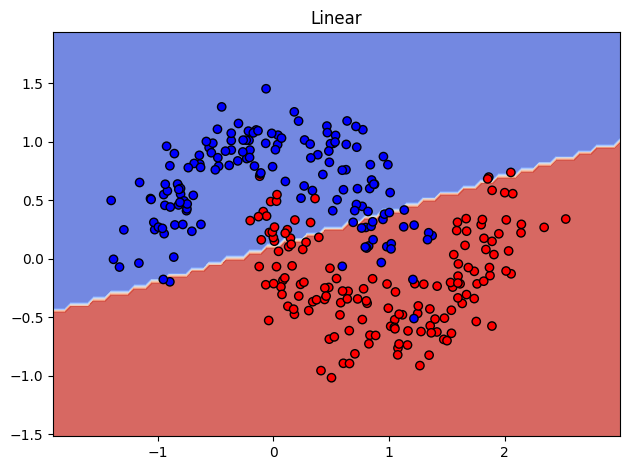

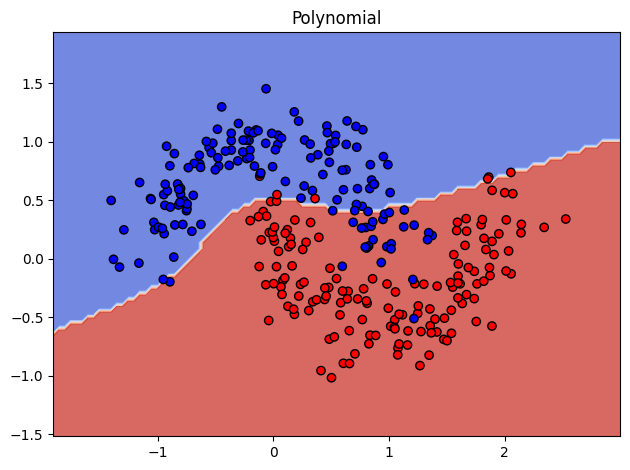

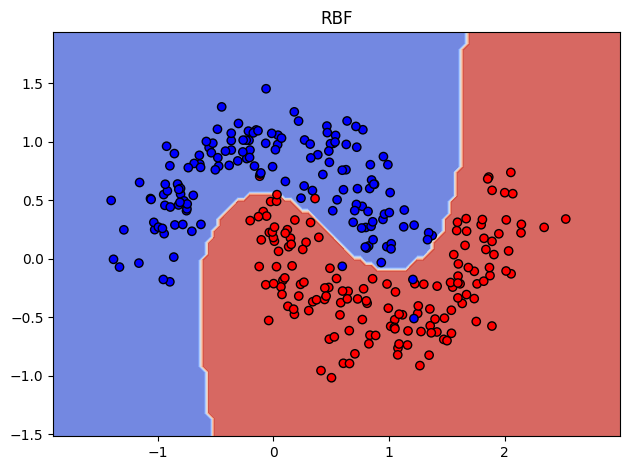

In [39]:
##ToDo
#Fit different kernels and visualize the decision boundaries
#Linear kernel
X = df[['x1', 'x2']].values
y = df['y'].values

#Linear kernel
clfL = svm.SVC(kernel='linear')
clfL.fit(X, y)
plot_decision_svm(X, y, clfL, kernel_name = 'Linear')


#Polynomial kernel
clfP = svm.SVC(kernel='poly', degree=3)
clfP.fit(X, y)
plot_decision_svm(X, y, clfP, kernel_name = 'Polynomial')

#RBF kernel
clfR = svm.SVC(kernel='rbf')
clfR.fit(X, y)
plot_decision_svm(X, y, clfR, kernel_name = 'RBF')




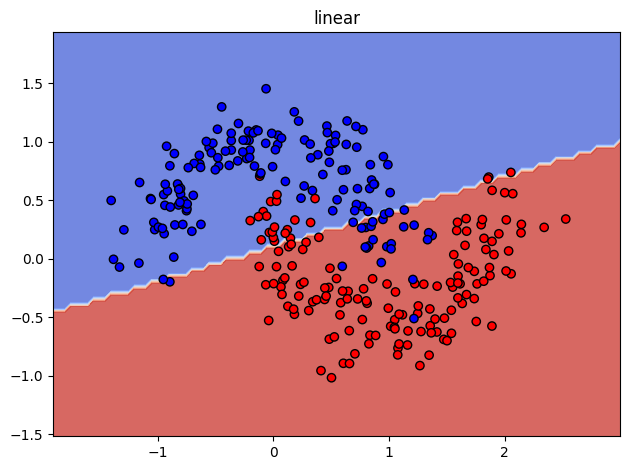

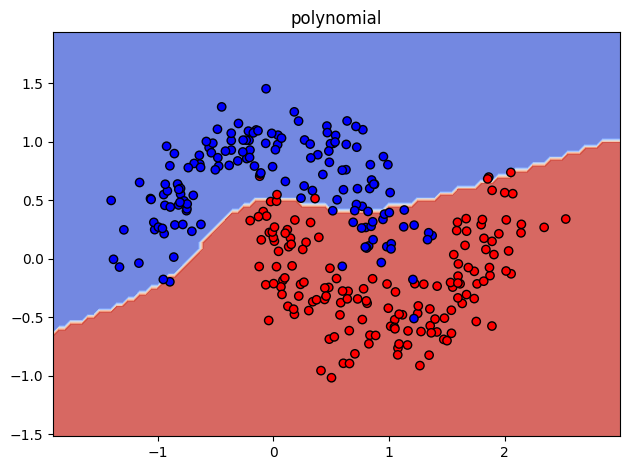

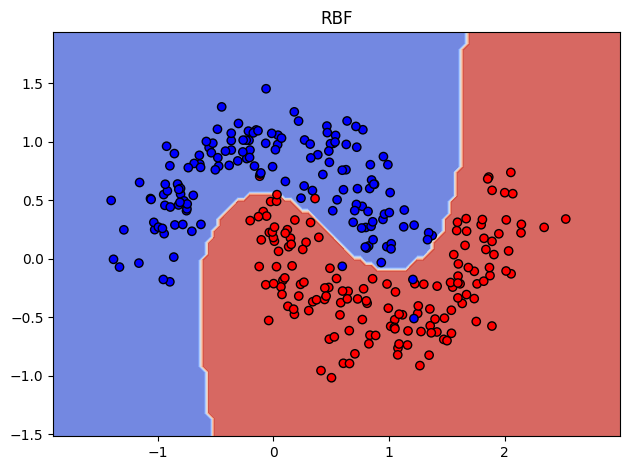

In [41]:
#Plot the decision boundary

plot_decision_svm(X, y, clfL, kernel_name = 'linear')
plot_decision_svm(X, y, clfP, kernel_name = 'polynomial')
plot_decision_svm(X, y, clfR, kernel_name = 'RBF')

In [16]:
#(iii)
#the linear kernel isnt able to completely separate the data points from the dataset
#the polynomial kernel is an improvement compared to the linear kernel but still its not able to completely separate the data points
#the rbf kernel is able to completely separate the datapoints from the dataset with the exception of a few points




### Optimize rbf Kernel
 

* Create a grid with the following values: {
         
                        'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 2],
                        
                         'C': [1e-2, 1e-1, 1, 2, 5, 10]}
* Use GridSearchCV with SVC(kernel='rbf') as classifier, and 3-fold-cross-validation(cv). 


In [29]:
##ToDo
C = [1e-2, 1e-1, 1, 2,5,10]
gamma = [1e-4, 1e-3, 1e-2, 1e-1, 1, 2]
gridParameters = {'C': C, 'gamma' : gamma}
grid = GridSearchCV(svm.SVC(kernel='rbf'), gridParameters, cv=3)
grid.fit(X, y)




GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 2, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 2]})

*   Plot a heatmap of the results using the provided helper function.

*   Interpret the heatmap. Analyze the effect of different values of hyperparameters. Does any combination of C and $\gamma$ leads to underfitting or overfitting?
*    Report the accuracy of the best model you get. State the hyperparameters used.

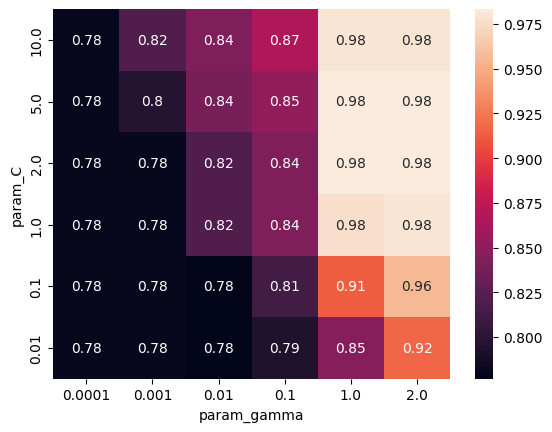

In [26]:
##ToDo
#Plot headmap of the result
heatmap(grid)   

In [37]:
#(v)
print('The best models hyper parameters are :' , grid.best_params_)
print('The best models score is:',grid.best_score_)
print(grid.best_estimator_)


The best models hyper parameters are : {'C': 2, 'gamma': 1}
The best models score is: 0.9833333333333334
SVC(C=2, gamma=1)
